In [104]:
import numpy as np
import matplotlib.pyplot as plt
from Projekt_2 import nmk_lin_mod_dyn, model_dyn_error, lin_mod_dyn_func, lin_mod_dyn_rek_func, lin_mod_dyn_y, \
    lin_mod_dyn_rek_y, nmk_nlin_mod_dyn, nlin_mod_dyn_y, nlin_mod_dyn_rek_y, model_error, model_dyn_error_rek


# Import danych

In [105]:
dane_ucz = np.loadtxt('dane/danedynucz13.txt')
dane_wer = np.loadtxt('dane/danedynwer13.txt')

## Rysowanie wykresów

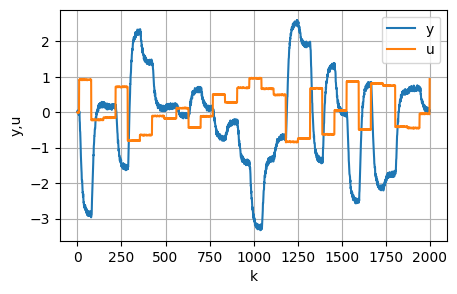

In [106]:
plt.figure(figsize=(5, 3))
plt.plot(dane_ucz[:,1], label='y')
plt.plot(dane_ucz[:,0], label='u')
# plt.title('Wykres danych uczących')
plt.xlabel('k')
plt.ylabel('y,u')
plt.legend()
plt.grid(True)
path='wykresy_dyn/dane_uczace.png'
plt.savefig(path,dpi=200)
plt.show()

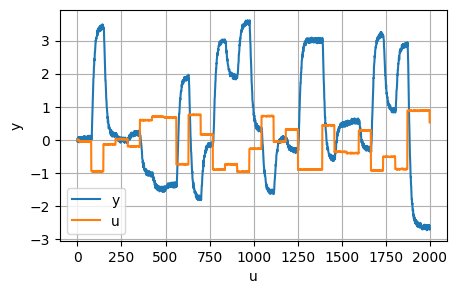

In [107]:
plt.figure(figsize=(5, 3))
plt.plot(dane_wer[:,1], label='y')
plt.plot(dane_wer[:,0], label='u')
# plt.title('Wykres danych weryfikujących')
plt.xlabel('u')
plt.ylabel('y')
plt.legend()
plt.grid(True)
path='wykresy_dyn/dane_weryfikujace.png'
plt.savefig(path,dpi=200)
plt.show()

# Dynamiczny model liniowy metodą najmniejszych kwadratów


In [108]:
N=3

## Wyznaczanie parametrów

In [109]:
a=np.zeros((N,N))
b=np.zeros((N,N))

for n in range(1,N+1):
    a_temp, b_temp = nmk_lin_mod_dyn(dane_ucz[:,0],dane_ucz[:,1],n)
    b[0:n,n-1]=b_temp
    a[0:n,n-1]=a_temp
print(b)
print(a)


[[-0.12419175 -0.01768592 -0.01784741]
 [ 0.         -0.14997036 -0.03261511]
 [ 0.          0.         -0.13319526]]
[[0.95342143 0.62629191 0.5993733 ]
 [0.         0.31123454 0.32164576]
 [0.         0.         0.0099563 ]]


# Wykresy

### Dane uczące bez rekurencji

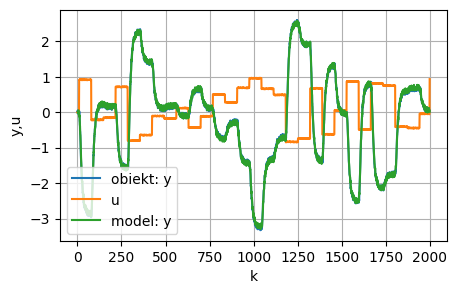

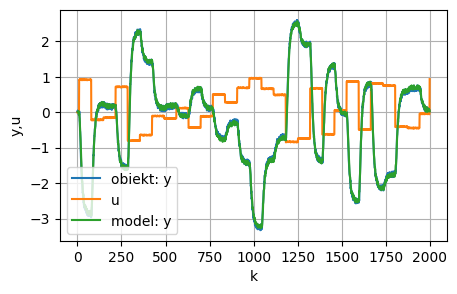

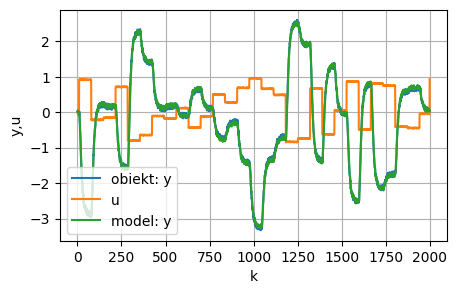

In [110]:
for n in range(1, N+1):  
    plt.figure(figsize=(5, 3))
    plt.plot(dane_ucz[:,1], label='obiekt: y')
    plt.plot(dane_ucz[:,0], label='u')
    k_vals=np.array(range(N,dane_ucz.shape[0]))
    plt.plot(k_vals, lin_mod_dyn_y(dane_ucz[:,0],dane_ucz[:,1],a[:n,n-1],b[:n,n-1],k_vals,N), label='model: y')
    
    # plt.title('Wykres modelu bez rekurencji dla zbioru uczącego dla n_A=n_B='+str(n))
    plt.xlabel('k')
    plt.ylabel('y,u')
    plt.legend()
    plt.grid(True)
    path='wykresy_dyn/dane_uczace_bez_rek_r_dyn_'+str(n)+'.png'
    plt.savefig(path,dpi=200)
    plt.show()

### Dane uczące z rekurencją

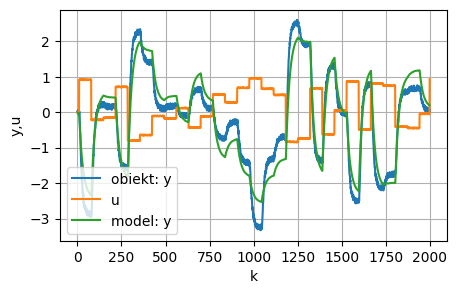

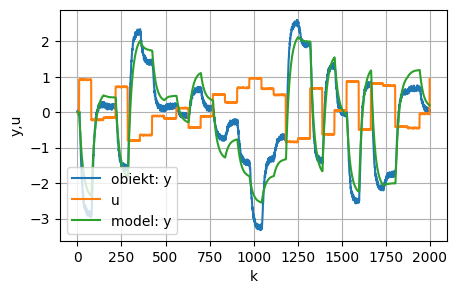

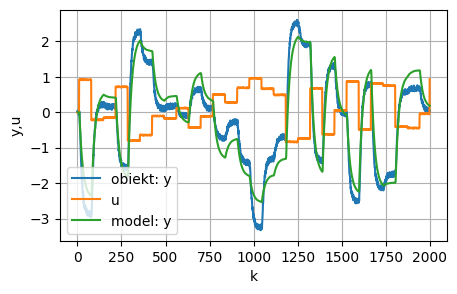

In [111]:
for n in range(1, N+1):
    plt.figure(figsize=(5, 3))
    plt.plot(dane_ucz[:,1], label='obiekt: y')
    plt.plot(dane_ucz[:,0], label='u')
    k_vals=np.array(range(N,dane_ucz.shape[0]))
    y_mod=lin_mod_dyn_rek_y(dane_ucz[:,0],dane_ucz[:,1],a[:n,n-1],b[:n,n-1],k_vals, N)
    plt.plot(k_vals, y_mod[N:,0], label='model: y')
    # plt.title('Wykres modelu z rekurencją dla zbioru uczącego dla n_A=n_B='+str(n))
    plt.xlabel('k')
    plt.ylabel('y,u')
    plt.legend()
    plt.grid(True)
    path='wykresy_dyn/dane_uczace_z_rek_r_dyn_'+str(n)+'.png'
    plt.savefig(path,dpi=200)
    plt.show()

### Dane weryfikujące bez rekurencji

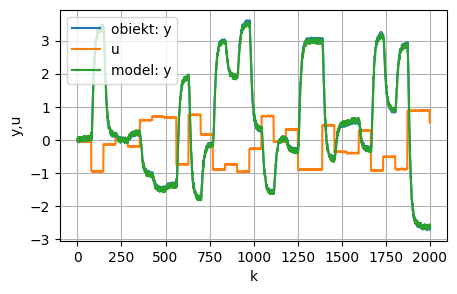

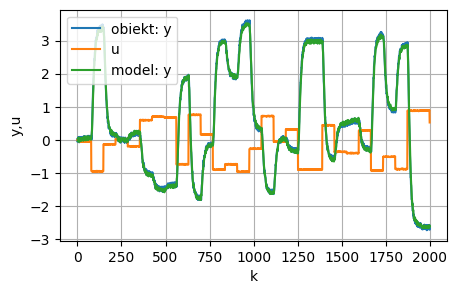

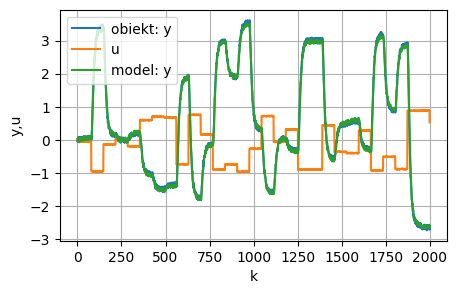

In [112]:
for n in range(1, N+1):
    plt.figure(figsize=(5, 3))
    plt.plot(dane_wer[:,1], label='obiekt: y')
    plt.plot(dane_wer[:,0], label='u')
    k_vals=np.array(range(N,dane_wer.shape[0]))
    plt.plot(k_vals, lin_mod_dyn_y(dane_wer[:,0],dane_wer[:,1],a[:n,n-1],b[:n,n-1],k_vals,N), label='model: y')
    # plt.title('Wykres modelu bez rekurencji dla zbioru uczącego dla n_A=n_B='+str(n))
    plt.xlabel('k')
    plt.ylabel('y,u')
    plt.legend()
    plt.grid(True)
    path='wykresy_dyn/dane_weryf_bez_rek_r_dyn_'+str(n)+'.png'
    plt.savefig(path,dpi=200)
    

### Dane weyfikujące z rekurencją

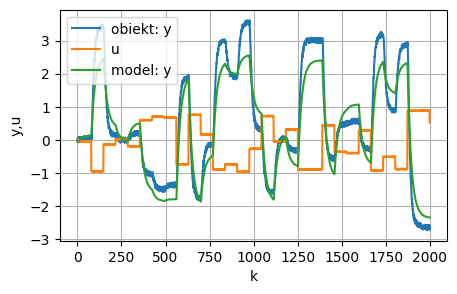

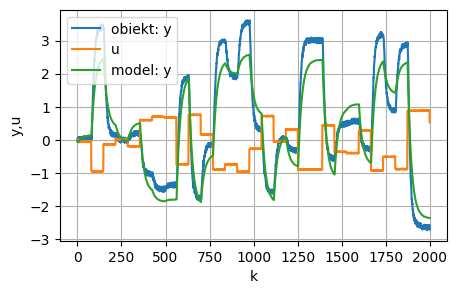

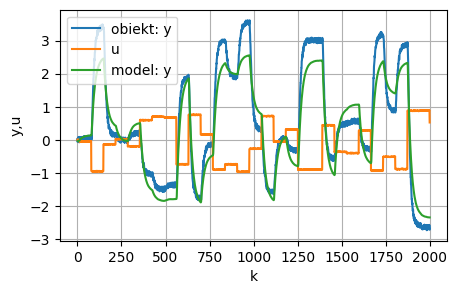

In [113]:
for n in range(1, N+1):
    plt.figure(figsize=(5, 3))
    plt.plot(dane_wer[:,1], label='obiekt: y')
    plt.plot(dane_wer[:,0], label='u')
    k_vals=np.array(range(N,dane_wer.shape[0]))
    y_mod=lin_mod_dyn_rek_y(dane_wer[:,0],dane_wer[:,1],a[:n,n-1],b[:n,n-1],k_vals, N)
    plt.plot(k_vals, y_mod[N:,0], label='model: y')
    # plt.title('Wykres modelu z rekurencją dla zbioru uczącego dla n_A=n_B='+str(n))
    plt.xlabel('k')
    plt.ylabel('y,u')
    plt.legend()
    plt.grid(True)
    path='wykresy_dyn/dane_weryf_z_rek_r_dyn_'+str(n)+'.png'
    plt.savefig(path,dpi=200)
    plt.show()

## Obliczanie błędów

In [114]:

error_ucz = np.zeros((N,1))
error_wer = np.zeros((N,1))
error_ucz_rek = np.zeros((N,1))
error_wer_rek = np.zeros((N,1))
for n in range(N):
    error_ucz[n, 0] = model_dyn_error(dane_ucz[:,0],dane_ucz[:,1],a[:n+1,n],b[:n+1,n],N,lin_mod_dyn_y)
    error_wer[n, 0] = model_dyn_error(dane_wer[:,0],dane_wer[:,1],a[:n+1,n],b[:n+1,n],N,lin_mod_dyn_y)
    error_ucz_rek[n, 0] = model_dyn_error_rek(dane_ucz[:,0],dane_ucz[:,1],a[:n+1,n],b[:n+1,n],N)
    error_wer_rek[n, 0] = model_dyn_error_rek(dane_wer[:,0],dane_wer[:,1],a[:n+1,n],b[:n+1,n],N)

errors=np.array([range(1,N+1)]).T
errors=np.column_stack((errors,error_ucz))
errors=np.column_stack((errors,error_ucz_rek))
errors=np.column_stack((errors,error_wer))
errors=np.column_stack((errors,error_wer_rek))

header = "Stopień wielomianu,Dane uczące,Dane weryfikujące"
np.savetxt("wyniki_csv/bledy_mod_dyn_lin.csv", errors, delimiter=",", header=header, comments='', fmt='%d, %.5f, %.5f, %.5f, %.5f')
print(errors)

[[1.         0.00567069 0.14691863 0.00603004 0.26570647]
 [2.         0.00495237 0.15051955 0.00564957 0.26518172]
 [3.         0.00480776 0.14414871 0.00560374 0.25583619]]


# Dynamiczny model nieliniowy metodą najmniejszych kwadratów


## Wyznaczanie parametrów nmk

In [115]:
p_max=4
r_dyn_max=3

w_vals=np.zeros((p_max*r_dyn_max*2,(p_max-1)*r_dyn_max))
tmp=0
for r_dyn in range(1, r_dyn_max + 1):
    for p in range(2, p_max + 1):
        w = nmk_nlin_mod_dyn(dane_ucz[:,0],dane_ucz[:,1],r_dyn, p)
        w_vals[0:r_dyn*p*2,tmp] = w
        tmp+=1
print(w_vals)

[[-1.27594339e-01 -4.57352306e-02 -4.68410659e-02 -3.42722268e-02
  -4.36689205e-03 -2.65920093e-02 -3.44983208e-02 -2.00441502e-02
  -4.50318945e-02]
 [ 9.45719802e-03  2.54458948e-02  3.05894817e-02  8.91264344e-02
   7.69781711e-02  2.05987161e-01  9.00052995e-02  6.44820703e-02
   2.18136052e-01]
 [ 9.50702713e-01 -1.90281013e-01 -1.87641603e-01 -1.38022437e-01
  -3.72251494e-02  9.86199300e-03 -2.85671528e-02  7.13485951e-05
   5.21551418e-02]
 [-2.75744662e-03  9.43267977e-01 -7.58868582e-03 -7.79380438e-02
  -6.26187777e-02 -1.69075641e-01 -2.52183496e-02 -1.01340539e-02
  -1.97974540e-01]
 [ 0.00000000e+00 -2.46046314e-03  9.42758258e-01  6.11582605e-01
  -4.55738071e-02 -4.06136481e-02 -1.27027357e-01 -2.88512488e-03
   2.32875764e-02]
 [ 0.00000000e+00 -7.73530786e-04 -3.11085985e-03 -1.33552111e-02
  -2.35987009e-01 -1.69812435e-01 -5.27301885e-02 -4.88438183e-02
  -2.14895711e-01]
 [ 0.00000000e+00  0.00000000e+00 -6.08668218e-04  3.22444177e-01
   5.31102832e-01 -2.8129052

## Wykresy

In [116]:
errors={'wer': np.zeros((r_dyn_max,p_max-1)),
        'ucz': np.zeros((r_dyn_max,p_max-1)),
        'wer_rek': np.zeros((r_dyn_max,p_max-1)),
        'ucz_rek': np.zeros((r_dyn_max,p_max-1))
        }

### Dane uczące bez rekurencji

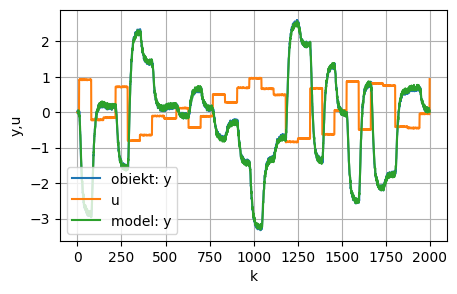

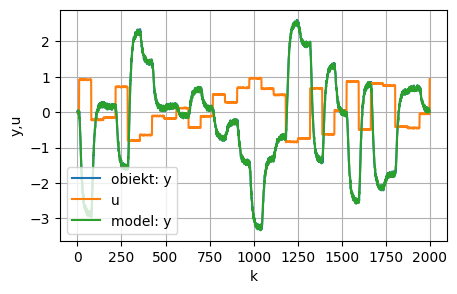

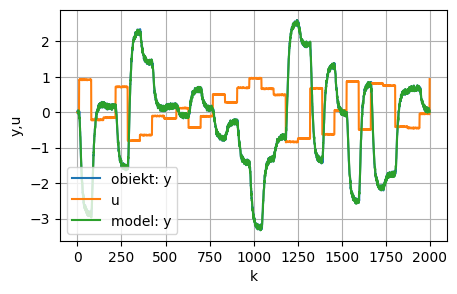

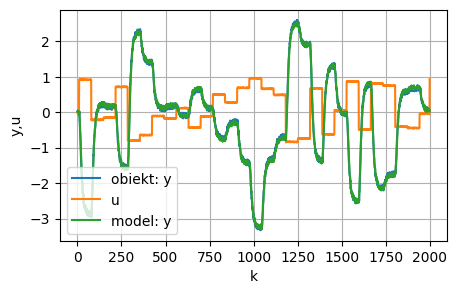

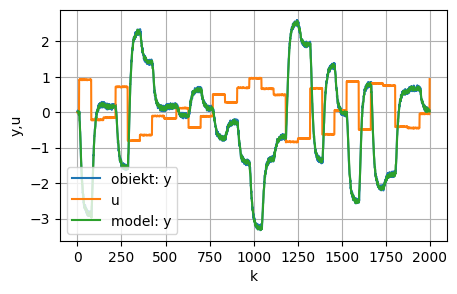

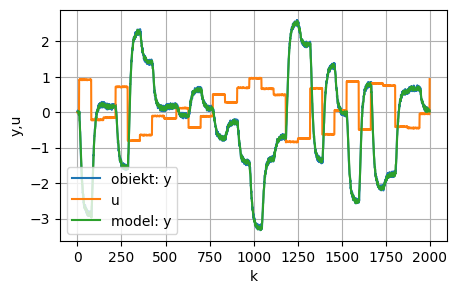

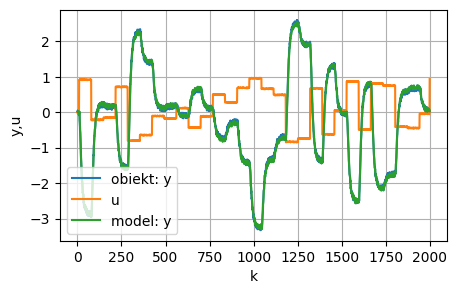

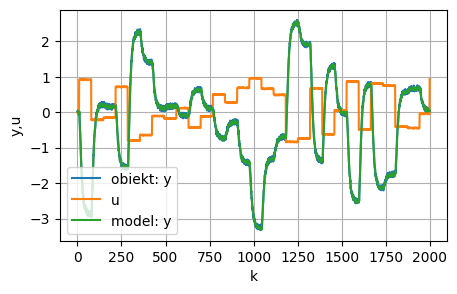

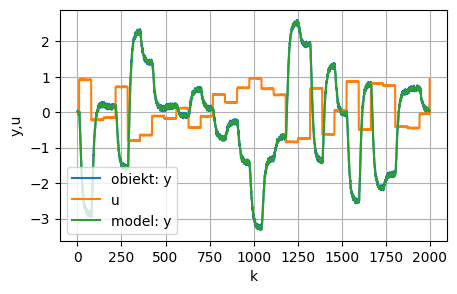

In [117]:
for r_dyn in range(1, r_dyn_max + 1):
    for p in range(2, p_max + 1):
        w = nmk_nlin_mod_dyn(dane_ucz[:,0],dane_ucz[:,1],r_dyn, p)
        y_mod = nlin_mod_dyn_y(dane_ucz[:,0],dane_ucz[:,1],w,r_dyn,p,r_dyn_max)
        errors['ucz'][r_dyn-1,p-2] = model_error(dane_ucz[r_dyn_max:,1], y_mod)
        k_vals=np.array(range(r_dyn_max,dane_ucz.shape[0]))

        plt.figure(figsize=(5, 3))
        plt.plot(dane_ucz[:,1], label='obiekt: y')
        plt.plot(dane_ucz[:,0], label='u')
        plt.plot(k_vals,y_mod, label='model: y')
        
        # plt.title('Wykres modelu bez rekurencji dla zbioru uczącego rzedu '+str(r_dyn)+' stopnia '+str(p))
        plt.xlabel('k')
        plt.ylabel('y,u')
        plt.legend()
        plt.grid(True)
        path='wykresy_dyn_nlin/dane_uczace_bez_rek_r_dyn_'+str(r_dyn)+'_st_'+str(p)+'.png'
        plt.savefig(path,dpi=200)
        plt.show()

### Dane uczące z rekurencją


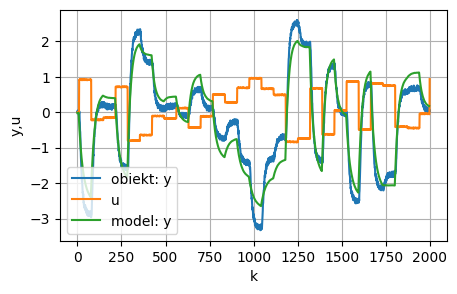

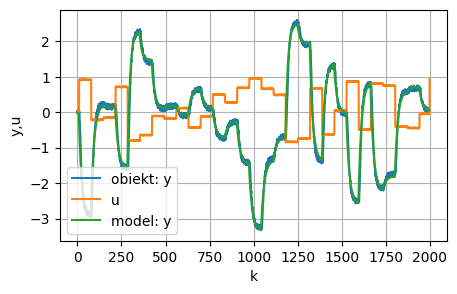

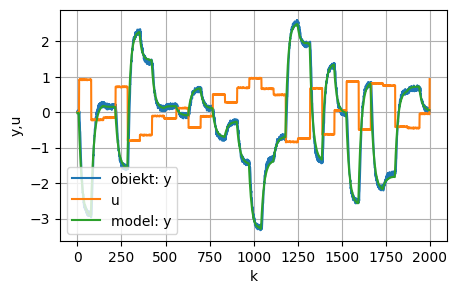

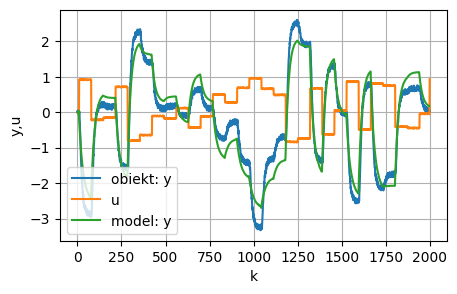

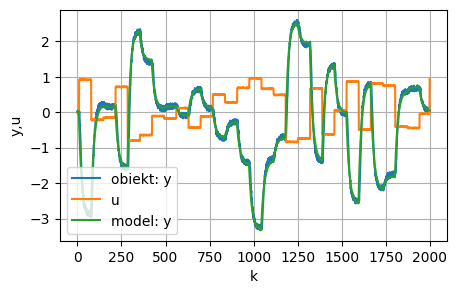

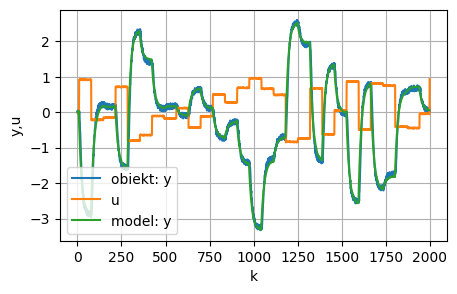

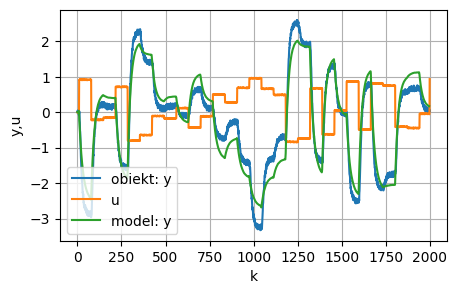

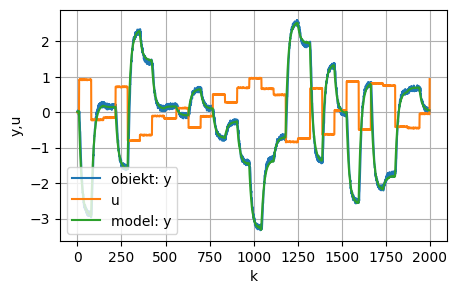

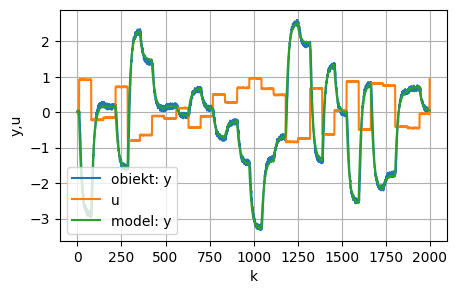

In [118]:
for r_dyn in range(1, r_dyn_max + 1):
    for p in range(2, p_max + 1):
        w = nmk_nlin_mod_dyn(dane_ucz[:,0],dane_ucz[:,1],r_dyn, p)
        y_mod=nlin_mod_dyn_rek_y(dane_ucz[:,0],dane_ucz[:,1],w,r_dyn,p,r_dyn_max)
        errors['ucz_rek'][r_dyn-1,p-2] = model_error(dane_ucz[r_dyn_max:,1][:, np.newaxis], y_mod)
        
        plt.figure(figsize=(5, 3))
        plt.plot(dane_ucz[:,1], label='obiekt: y')
        plt.plot(dane_ucz[:,0], label='u')
        
        plt.plot(nlin_mod_dyn_rek_y(dane_ucz[:,0],dane_ucz[:,1],w,r_dyn,p,r_dyn_max), label='model: y')
        
        # plt.title('Wykres modelu z rekurencją dla zbioru uczącego rzedu '+str(r_dyn)+' stopnia '+str(p))
        plt.xlabel('k')
        plt.ylabel('y,u')
        plt.legend()
        plt.grid(True)
        path='wykresy_dyn_nlin/dane_uczace_z_rek_r_dyn_'+str(r_dyn)+'_st_'+str(p)+'.png'
        plt.savefig(path,dpi=200)
        plt.show()

### Dane weryfikujące bez rekurencji

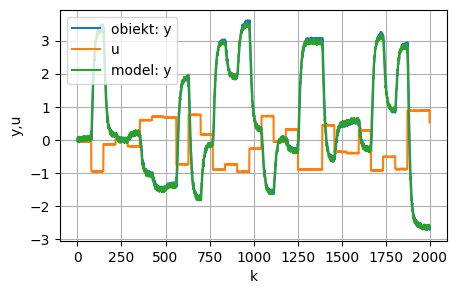

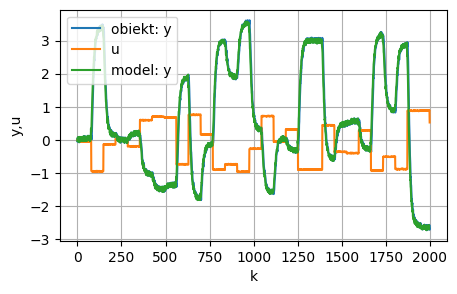

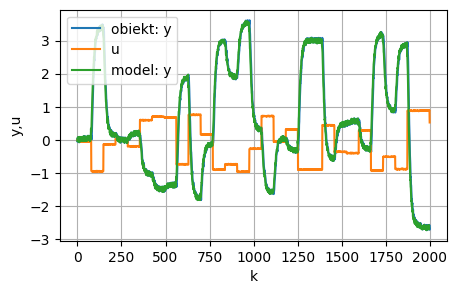

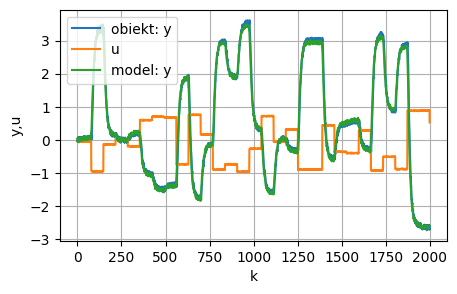

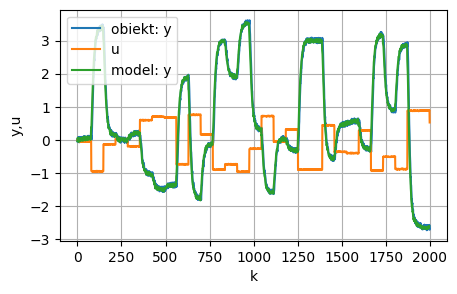

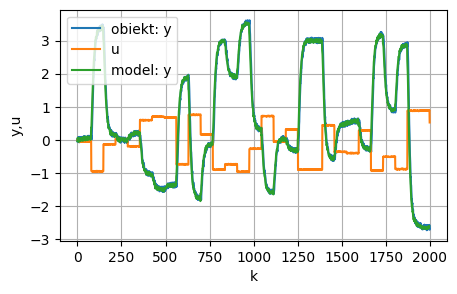

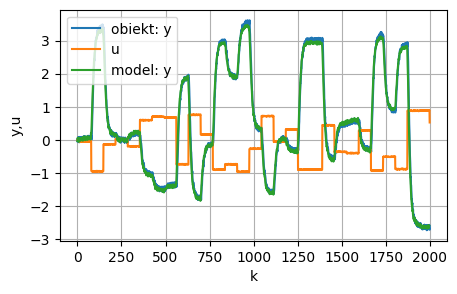

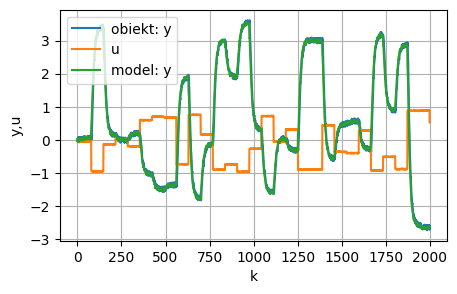

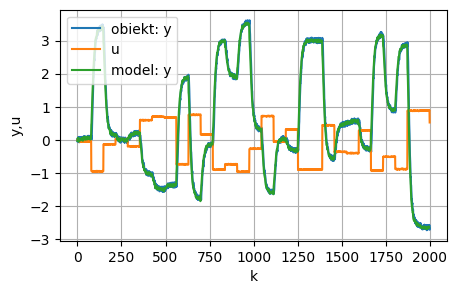

In [119]:
for r_dyn in range(1, r_dyn_max + 1):
    for p in range(2, p_max + 1):
        w = nmk_nlin_mod_dyn(dane_ucz[:,0],dane_ucz[:,1],r_dyn, p)
        y_mod=nlin_mod_dyn_y(dane_wer[:,0],dane_wer[:,1],w,r_dyn,p,r_dyn_max)
        y=dane_wer[:,1]
        errors['wer'][r_dyn-1,p-2] = model_error(dane_wer[r_dyn_max:,1], y_mod)
        
        plt.figure(figsize=(5, 3))
        plt.plot(dane_wer[:,1], label='obiekt: y')
        plt.plot(dane_wer[:,0], label='u')
        plt.plot(y_mod, label='model: y')
        
        # plt.title('Wykres modelu bez rekurencji dla zbioru weryfikującego rzedu '+str(r_dyn)+' stopnia '+str(p))
        plt.xlabel('k')
        plt.ylabel('y,u')
        plt.legend()
        plt.grid(True)
        path='wykresy_dyn_nlin/dane_wer_bez_rek_r_dyn_'+str(r_dyn)+'_st_'+str(p)+'.png'
        plt.savefig(path,dpi=200)
        plt.show()

### Dane weryfikujące z rekurencją

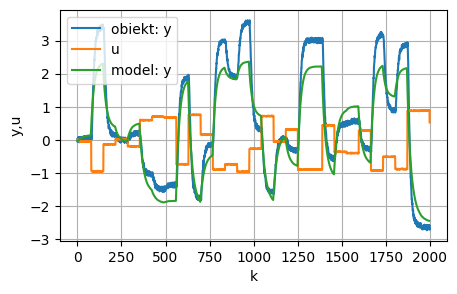

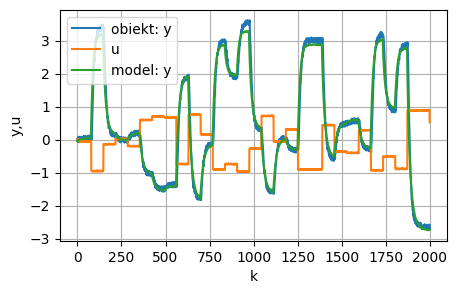

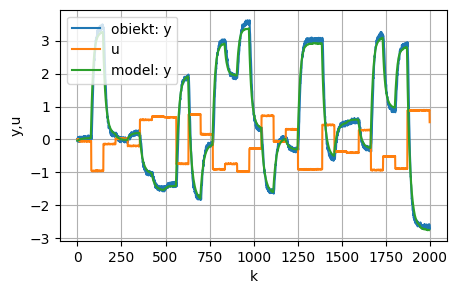

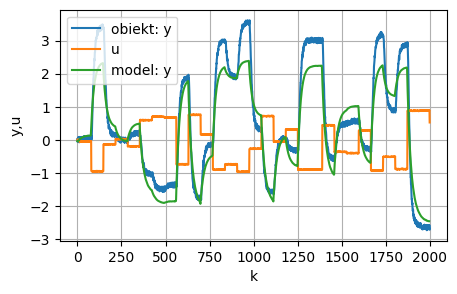

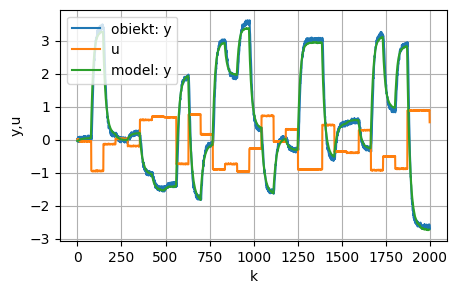

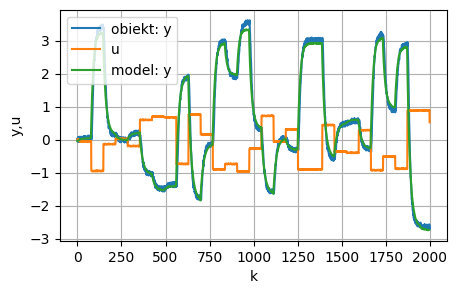

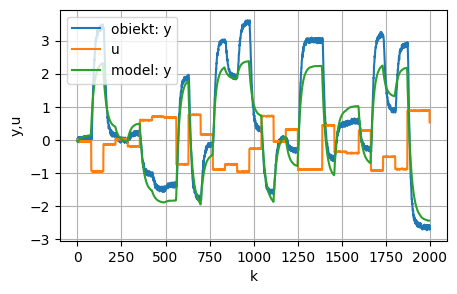

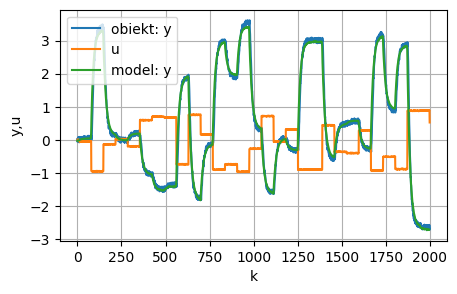

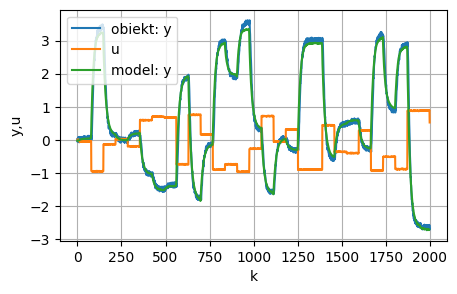

In [120]:
for r_dyn in range(1, r_dyn_max + 1):
    for p in range(2, p_max + 1):
        w = nmk_nlin_mod_dyn(dane_ucz[:,0],dane_ucz[:,1],r_dyn, p)
        y_mod=nlin_mod_dyn_rek_y(dane_wer[:,0],dane_wer[:,1],w,r_dyn,p,r_dyn_max)
        error = model_error(dane_wer[r_dyn_max:,1][:, np.newaxis], y_mod)
        errors['wer_rek'][r_dyn-1,p-2] = error
        
        plt.figure(figsize=(5, 3))
        plt.plot(dane_wer[:,1], label='obiekt: y')
        plt.plot(dane_wer[:,0], label='u')
        plt.plot(y_mod, label='model: y')

        # plt.title('Wykres modelu z rekurencją dla zbioru weryfikującego rzędu '+str(r_dyn)+' stopnia '+str(p))
        plt.xlabel('k')
        plt.ylabel('y,u')
        plt.legend()
        plt.grid(True)
        path='wykresy_dyn_nlin/dane_wer_z_rek_r_dyn_'+str(r_dyn)+'_st_'+str(p)+'.png'
        plt.savefig(path,dpi=200)
        plt.show()

In [121]:
print(errors['ucz'])

[[0.00564665 0.00526619 0.0052659 ]
 [0.00489462 0.00415274 0.00414753]
 [0.00472533 0.00365347 0.00364001]]


In [122]:
print(errors['ucz_rek'])

[[0.1411501  0.01284154 0.01284216]
 [0.1438397  0.01085544 0.01077841]
 [0.1372896  0.00774521 0.00766508]]


In [123]:
print(errors['wer'])

[[0.0064368  0.00542072 0.00537261]
 [0.00647349 0.00438373 0.00439187]
 [0.00675881 0.00409964 0.00414827]]


In [124]:
print(errors['wer_rek'])

[[0.28830099 0.02546627 0.02267889]
 [0.28754457 0.01749132 0.01845482]
 [0.28478006 0.01255323 0.01407725]]


In [125]:
errors_csv=np.array([range(1, N + 1)]).T
errors_csv=np.column_stack((errors_csv, errors['ucz']))
errors_csv=np.column_stack((errors_csv, errors['ucz_rek']))
errors_csv=np.column_stack((errors_csv, errors['wer']))
errors_csv=np.column_stack((errors_csv, errors['wer_rek']))

header = "Rząd dynamiki,Dane uczące,Dane weryfikujące"
np.savetxt("wyniki_csv/bledy_mod_dyn_nlin.csv", errors_csv, delimiter=",", header=header, comments='',fmt = ['%d'] + ['%.4f'] * (errors_csv.shape[1] - 1))